<a href="https://colab.research.google.com/github/JosenildoJunior/StatPyDataScience/blob/main/Case_depress%C3%A3o_(NHNES).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Retrato da Depressão nos EUA: Explorando Perfis e Associações com Hábitos de Saúde (2005-2006)**

Os dados para realização desse case são sobre o transtorno depressivo, um problema multifatorial que pode ter várias possíveis combinações de situações como causa.

Os dados disponíveis são resultados da NHNES (National Health and Nutrition Examination Survey), realizada anualmente nos EUA para avaliar a saúde e nutrição de adultos e crianças;

**O objetivo é responder as seguintes perguntas**:

  - Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006?

  - Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população?


## **Análise inicial nos dados**

Nessa etapa, vamos estabelecer um primeiro contato com os nossos dados. Para começar, vamos responder algumas perguntas:

- Quantos dados temos? (Número de linhas e colunas)

- Quais são as colunas numéricas?

- Temos duplicatas na nossa base de dados? Se sim, vamos removê-las.

- Existem dados nulos nesta base de dados? Será que eles indicam algo importante? O que devemos fazer com eles?

- Vamos observar o dicionário dos dados.

- Qual é a média, mediana, 25º percentil, 75º percentil, mínimo e máximo de cada uma das colunas numéricas?


Antes de tudo, vamos importar as bibliotecas que serão necessárias para realizarmos nossas análises.


In [1]:
# Manipulação de dados
import pandas as pd

# Algébra linear
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Funções estatísticas
import statistics
import scipy.stats

# Importando o skew
from scipy.stats import skew

Agora vamos importar nossos dados.


In [2]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importando o dataset
df = pd.read_csv('/content/drive/MyDrive/Estatística para ciência de dados/DEMO_PHQ.csv')

# Observando os primeiro registros
df.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


Logo nesse primeiro contato, podemos observar que temos algumas variáveis com valores ausentes. Vamos analisar um pouco mais esses dados e, em seguida, observar o dicionário de dados do mesmo.


In [4]:
# Dimensão do nosso DF
df.shape

(5334, 15)

Temos 5334 linhas e 15 colunas.

Agora vamos observar o dicionário dos dados.


- **Variável: SEQN**
  - **Descrição:** Identificador único do respondente
  - **Valores:**

- **Variável: DPQ010**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Pouco interesse ou pouco prazer em fazer as coisas
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: DPQ020**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Se sentiu para baixo, deprimido(a) ou sem perspectiva
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: DPQ030**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o costume
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: DPQ040**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Se sentiu cansado(a) ou com pouca energia
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: DPQ050**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Falta de apetite ou comeu demais
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: DPQ060**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a)
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: DPQ070**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: DPQ080**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Teve lentidão para se movimentar ou falar (a ponto de outras pessoas perceberem), ou ao contrário, esteve tão agitado(a) que você ficava andando de um lado para o outro mais do que costume
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: DPQ090**
  - **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: Pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)
  - **Valores:**
    - 0 = Nenhuma vez
    - 1 = Menos de uma semana
    - 2 = Uma semana ou mais
    - 3 = Quase todos os dias
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: RIAGENDR**
  - **Descrição:** Gênero
  - **Valores:**
    - 1 = Masculino
    - 2 = Feminino

- **Variável: RIDAGEYR**
  - **Descrição:** Idade em anos
  - **Valores:**

- **Variável: RIDRETH1**
  - **Descrição:** Raça/Etnia
  - **Valores:**
    - 1 = Branco não-hispânico
    - 2 = Negro não-hispânico
    - 3 = Mexicano-americano
    - 4 = Outro
    - 5 = Outro - Hispânico

- **Variável: DMDEDUC**
  - **Descrição:** Escolaridade
  - **Valores:**
    - 1 = Menor que 9º ano
    - 2 = 9-12º ano
    - 3 = Ensino médio
    - 4 = Ensino superior incompleto
    - 5 = Superior completo ou maior
    - 7 = Se recusou a responder
    - 9 = Não sabe

- **Variável: INDFMINC**
  - **Descrição:** Renda anual familiar (US$)
  - **Valores:**
      - 1 = 0-4999
      - 2 = 5000-9999
      - 3 = 10000-14999
      - 4 = 15000-19999
      - 5 = 20000-24999
      - 6 = 25000-34999
      - 7 = 35000-44999
      - 8 = 45000-54999
      - 9 = 55000-64999
      - 10 = 65000-74999
      - 11 = Maior ou igual a 75000
      - 12 = Maior que 20000
      - 13 = Menor que 20000
      - 77 = Se recusou a responder
      - 99 = Não sabe


Dessa forma, podemos entender melhor o que cada variável tem a nos dizer. Dito isso, vamos entender o tipo dos nossos dados.


In [5]:
# Observando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


Dessa forma, podemos perceber que todas as nossas variáveis das perguntas são qualitativas categóricas. O mesmo se aplica para RIAGENDER, DMDEDUC, RIDRETH1 e INDFMINC, porém a variável INDFMINC é do tipo quantitativa numérica.

A variável SEQN é semelhante a um ID dos nossos dados. Logo, a princípio, por ser um atributo identificador, ele não deve se repetir. Vamos observar se existe algum SEQN repetido na nossa base.


In [6]:
# Observando a soma de valores duplicados
df['SEQN'].duplicated().sum()

0

O resultado foi 0, então podemos assumir que cada um dos nossos identificadores é único.


Agora vamos observar quantos valores ausentes existem em nossa base.


In [7]:
# Observando os valores ausentes
def soma_ausentes(df):
    p_faltantes = df.isnull().sum()
    valores_faltantes = pd.DataFrame({'Variavéis': df.columns,
                                           'Soma de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['Soma de ausentes'], ascending = False)

# Exibindo a quantidade de valores ausentes
soma_ausentes(df)

,Variavéis,Soma de ausentes
1,DPQ010,498
2,DPQ020,498
3,DPQ030,498
4,DPQ040,498
5,DPQ050,498
6,DPQ060,498
7,DPQ070,498
8,DPQ080,498
9,DPQ090,498
14,INDFMINC,47


Como podemos observar, temos o mesmo número de valores ausentes desde as variáveis 'DPQ010' até 'DPQ090', sendo que a soma de valores ausentes é um total de 498 para cada uma dessas perguntas. Enquanto na variável 'indfminc', temos apenas 47 valores ausentes. O restante das nossas variáveis não apresentam nenhum valor ausente.

Agora vamos observar um resumo estatístico dos nossos dados.


In [8]:
# Resumo estatístico dos dados
df.describe()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
count,5334.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,5334.000000,5334.000000,5334.000000,5334.000000,5287.000000
mean,36358.796775,0.307279,0.313069,0.551282,0.717328,0.320720,0.209884,0.230356,0.147849,0.050248,1.519873,45.089989,2.871016,3.233221,8.738604
std,2964.731827,0.758459,0.710683,0.931166,0.913711,0.743057,0.624552,0.639186,0.590390,0.326933,0.499652,20.145853,1.128468,1.268395,12.777756
min,31130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000
25%,33838.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,3.000000,2.000000,4.000000
50%,36347.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,43.000000,3.000000,3.000000,7.000000
75%,38915.750000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,62.000000,4.000000,4.000000,10.000000
max,41473.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,85.000000,5.000000,9.000000,99.000000


- Observando as perguntas de DPQ010 a DPQ090:
  - Aparentemente, apresentam o mesmo valor mínimo.
  - O primeiro e segundo quartis também são iguais.
  - No terceiro quartil, apenas duas variáveis têm valores diferentes.
  - As médias não diferem muito da mediana, sugerindo uma distribuição próxima da normal, embora um pouco deslocada.
  - A pergunta DPQ040 teve a maior média.
  - Ambas as perguntas apresentam o mesmo valor máximo.
  - A semelhança entre valores mínimos e máximos pode ser devido às perguntas possuírem alternativas iguais, diferindo apenas na pergunta em si.


- A variável Riagender refere-se ao gênero, necessitando de outra análise.

- RIDAGEYR se refere à idade:
  - A pessoa mais nova tem 18 anos e a mais velha, 85.
  - Média de 45 anos e mediana de 43.
  - Setenta e cinco por cento dos dados têm menos de 62 anos.

- RIDRETH1 está relacionado à etnia, com valores de 1 a 5:
  - Necessita de outra análise mais detalhada.

- DMDEDUC relaciona-se ao grau de escolaridade:
  - A média é o ensino médio.
  - 75% das pessoas tem, no máximo, um ensino superior incompleto.

- INDFMINC representa faixas salariais:
  - Sendo que a média salarial gira em torno de 45 a 55 mil dólares.
  - Setenta e cinco por cento têm renda anual de até 75 mil dólares.


**Iniciando análise na segunda base de dados**

Essa nossa análise inicial foi feita com base nos dados sobre alguns sintomas em adultos. Agora vamos realizar uma análise em outra base, só que dessa vez ela será voltada para alimentação e atividades físicas. Essa nossa base se trata de um questionário que avalia a qualidade da dieta dos pacientes, incluindo adultos e crianças. Dito isso, vamos seguir para a importação da mesma.

In [9]:
# Importando o dataset
df2 = pd.read_csv('/content/drive/MyDrive/Estatística para ciência de dados/PAG_HEI.csv')

# Observando os primeiro registros
df2.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


Agora que já tivemos uma pequena amostra de como estão os nossos dados, vamos observar a dimensão do nosso DataFrame.

In [10]:
# Dimensão do nosso DF
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

Esse nosso segundo DataFrame possui 9424 linhas e 17 colunas, sendo que a variável 'PAG_MINW' é do tipo quantitativa numérica enquanto a variável 'ADHERENCE' é qualitativa categórica.

Agora vamos observar o dicionário dos dados para entendermos melhor o que cada uma dessas variáveis tem a nos contar.

**SEQN**: Identificador único do respondente

**PAG_MINW**: Tempo total semanal de atividade aeróbica moderada-vigorosa em minutos segundo o Physical Activity Guideline (PAG)

**ADHERENCE**: Grupo de aderência ao Physical Activity Guideline (PAG)
- 1: Baixo (< 150 min/semana)
- 2: Adequado (150-300 min/semana)
- 3: Acima (> 300 min/semana)

**HEI2015C1_TOTALVEG**: Healthy Eating Index - Componente 1 - Total de Vegetais

**HEI2015C2_GREEN_AND_BEAN**: Healthy Eating Index - Componente 2 - Verduras verde-escuras e leguminosas

**HEI2015C3_TOTALFRUIT**: Healthy Eating Index - Componente 3 - Frutas totais

**HEI2015C4_WHOLEFRUIT**: Healthy Eating Index - Componente 4 - Frutas in natura

**HEI2015C5_WHOLEGRAIN**: Healthy Eating Index - Componente 5 - Grãos integrais

**HEI2015C6_TOTALDAIRY**: Healthy Eating Index - Componente 6 - Laticínios

**HEI2015C7_TOTPROT**: Healthy Eating Index - Componente 7 - Proteínas

**HEI2015C8_SEAPLANT_PROT**: Healthy Eating Index - Componente 8 - Plantas marinhas e proteínas vegetais

**HEI2015C9_FATTYACID**: Healthy Eating Index - Componente 9 - Ácido-graxo

**HEI2015C10_SODIUM**: Healthy Eating Index - Componente 10 - Sódio

**HEI2015C11_REFINEDGRAIN**: Healthy Eating Index - Componente 11 - Grãos refinados

**HEI2015C12_SFAT**: Healthy Eating Index - Componente 12 - Gordura saturada

**HEI2015C13_ADDSUG**: Healthy Eating Index - Componente 13 - Açúcares adicionados

**HEI2015_TOTAL_SCORE**: Healthy Eating Index - Escore total


É interessante observarmos que cada elemento se refere a algum componente da alimentação e, no final, temos um escore total referente à soma de cada componente que compõe a alimentação de cada registro.

Como vimos no primeiro DataFrame, temos uma coluna que é o nosso atributo chave. Nesse caso, trata-se da coluna SEQN. Vamos observar se existe alguma repetição nessa variável.

In [11]:
# Observando a soma de valores duplicados
df2['SEQN'].duplicated().sum()

0

Novamente, podemos constatar que não temos nenhuma repetição nessa variável.

Agora vamos observar se existem valores ausentes. Logo na primeira vez que importamos e exibimos os primeiros registros, já percebemos a existência dos mesmos. Então, vamos observar quantos são em cada uma das variáveis.

In [12]:
# Observando os valores ausentes
def soma_ausentes(df):
    p_faltantes = df.isnull().sum()
    valores_faltantes = pd.DataFrame({'Variavéis': df.columns,
                                           'Soma de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['Soma de ausentes'], ascending = False)

# Exibindo a quantidade de valores ausentes
soma_ausentes(df2)

,Variavéis,Soma de ausentes
2,ADHERENCE,2274
1,PAG_MINW,2274
8,HEI2015C6_TOTALDAIRY,875
10,HEI2015C8_SEAPLANT_PROT,875
15,HEI2015C13_ADDSUG,875
14,HEI2015C12_SFAT,875
13,HEI2015C11_REFINEDGRAIN,875
12,HEI2015C10_SODIUM,875
11,HEI2015C9_FATTYACID,875
16,HEI2015_TOTAL_SCORE,875


Apenas a variável SEQN não apresenta nenhum valor ausente, o que já era de se esperar levando em consideração que ela é o nosso atributo chave. As variáveis 'ADHERENCE' e 'PAG_MINW' apresentam o maior número de valores ausentes. O restante das variáveis, com exceção da variável 'SEQN', apresentaram o mesmo número de valores ausentes, sendo todos 875.

"Agora que vimos um pouco dos nossos dados ausentes, vamos observar um breve resumo estatístico dos nossos dados.

In [13]:
# Resumo estatístico dos dados
df2.describe()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,9424.000000,7150.000000,7150.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000
mean,36311.463285,565.120067,2.074685,2.862097,1.547884,2.659902,2.405864,1.674949,4.054757,4.211867,2.325303,4.205320,4.988956,5.540906,5.781459,5.959600,48.218865
std,2991.517794,908.839544,0.917351,1.472391,2.046650,1.930251,2.152560,1.823515,1.478922,1.157194,2.132526,3.147736,3.293786,3.452289,3.090926,3.215960,11.884725
min,31128.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.243513
25%,33720.750000,55.427252,1.000000,1.692308,0.000000,0.725494,0.000000,0.000000,3.336989,3.587339,0.000000,1.544438,2.258630,2.652670,3.514716,3.599885,39.643349
50%,36307.500000,256.351039,2.000000,2.753825,0.000000,2.618554,2.179715,1.018207,5.000000,5.000000,1.836220,3.789177,5.144181,5.880968,5.979335,6.327416,47.589498
75%,38902.250000,696.016166,3.000000,4.165605,3.498013,5.000000,5.000000,2.997076,5.000000,5.000000,5.000000,6.464805,7.705660,8.756728,8.390884,8.859520,56.028859
max,41474.000000,13801.385681,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383


**Temos alguns pontos interessantes para observarmos**:

- Ao analisar a variável 'PAG_MINW', que se refere ao tempo total de atividade aeróbica moderada-vigorosa em minutos, podemos observar que a média da nossa base é de 565 minutos, enquanto a mediana é de 256. O valor máximo de 13801 minutos indica a presença de outliers, o que contribui para a diferença significativa entre a média e a mediana. O terceiro quartil está em 696, indicando que 75% dos nossos dados estão abaixo desse valor.

- Na variável 'ADHERENCE', que representa a aderência ao tempo adequado de atividades físicas, a média é de 2, o que é considerado adequado de acordo com nosso dicionário de dados. A mediana está próxima da média, e o terceiro quartil é 3, o que sugere que a distribuição desses dados pode se aproximar de uma normal.

- Na variável 'HEI2015C1_TOTALVEG', que indica o total de vegetais, a média é de 2,8, e a mediana está próxima da média. Os valores variam de 0 a 5, que são os limites das alternativas.

- Na variável 'HEI2015C3_TOTALFRUIT', que representa o total de frutas, a média é de 2,65, e a mediana é de 2,61. Novamente, a média e a mediana estão próximas.

- Entre todas as outras variáveis, temos uma que representa o escore total, 'HEI2015_TOTAL_SCORE', com média de 48 e mediana de 47, indicando uma distribuição semelhante. Observando o terceiro quartil, notamos que 75% dos nossos dados estão abaixo de 56 e 25% acima de 39, sugerindo que a distribuição desses dados pode se aproximar de uma normal.

Como acabamos de observar, temos duas bases de dados que serão necessárias para cumprirmos nossos objetivos. Sendo assim, vamos unificar as mesmas utilizando a variável 'SEQN' como nosso atributo chave. Dito isso, vamos realizar a junção das bases.

In [14]:
# Realizando a junção
df_junto = pd.merge(df, df2, on='SEQN', how='inner')

# Observando os primeiros registros
df_junto.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393


Utilizamos o parâmetro 'inner' para que apenas as linhas que tenham os valores chaves em ambas as colunas sejam exibidas. Agora vamos partir para o tratamento dos dados.

Vamos observar as informações gerais dos nossos dados.

In [15]:
# Observando as informações
df_junto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

Dessa forma, podemos notar que nosso df_junto apresenta 5334 linhas e um total de 31 colunas.

## **Tratamento nos dados**

Nessa etapa, temos alguns pontos que precisam de nossa atenção:

- No caso das respostas com valores 7 e 9, pretendo adicionar uma variável com o escore de cada registro para demonstrar o quão severo é o grau de depressão dessa pessoa. No entanto, respostas com valores 7 e 9 podem comprometer bastante esse passo. Portanto, precisamos ajustar o valor do mesmo.

- Tratamento de valores ausentes: Como vamos ficar apenas na analise exploratoria dos dados não iremos realizar nenhum tratamento a respeito desses dados

- Criação de variáveis para soma de escores para cada pessoa na base.


Vamos começar o nosso tratamento organizando as perguntas que têm como resposta 7 ou 9, que são referentes a 7 = “Se recusou a responder” e 9 = “Não sabe”, respectivamente. Por se tratar de uma variável categórica, vamos alterar o seu valor com o intuito de futuramente criarmos uma variável para somar o score total somando as respostas das perguntas de cada pessoa. Dito isso, para pessoas que se recusaram a responder, vamos atribuir um valor de 0.6, e para pessoas que não sabem, será atribuído um valor de 0.3.

Realizando essas substituições, corremos o risco de considerar uma pessoa com altos níveis de depressão mesmo ela não estando. No entanto, caso isso aconteça, é porque a pessoa tem outros indícios desde o começo. Portanto, se ela receber um auxílio mesmo tendo sido classificada 'erroneamente', de qualquer forma o auxílio será importante para ela. Acredito que nesse caso o falso positivo é menos agravante do que um falso negativo.


In [16]:
# Definindo as substituições desejadas
substituicoes = {7: 0.6, 9: 0.3}

# Selecionando as colunas desejadas
colunas_desejadas = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']

# Substituindo os valores nas colunas selecionadas com base nas substituições definidas
df_junto[colunas_desejadas] = df_junto[colunas_desejadas].replace(substituicoes)

# Observando as mudanças em apenas uma variável
df_junto['DPQ010'].value_counts()

DPQ010
0.0    3850
1.0     673
2.0     180
3.0     124
0.3       9
Name: count, dtype: int64

Podemos ver então que as mudanças foram feitas corretamente.

Agora que já tratamos essa parte, vamos deixar nosso DataFrame mais enxuto e manter apenas as variáveis que temos interesse. Dito isso, vamos eliminar as variáveis que não utilizaremos.

In [17]:
# DataFrame contendo as variáveis que serão utilizadas
variaveis_para_manter = [
    'SEQN','DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090',
    'INDFMINC', 'RIDAGEYR', 'DMDEDUC', 'RIDRETH1', 'PAG_MINW',
    'ADHERENCE', 'HEI2015C1_TOTALVEG', 'HEI2015C3_TOTALFRUIT', 'HEI2015_TOTAL_SCORE'
]

# Selecionando apenas as colunas desejadas
df_junto = df_junto[variaveis_para_manter]

Agora vamos criar uma variável para somar os valores das respostas do questionário DPQ010 até DPQ090. Vamos chamar essa variável de 'phq9'.

In [18]:
# Criando uma nova coluna para armazenar a soma das respostas
df_junto['phq9'] = df_junto.loc[:, 'DPQ010':'DPQ090'].sum(axis=1)

# Exibindo os primeiros registros
df_junto.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,INDFMINC,RIDAGEYR,DMDEDUC,RIDRETH1,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C3_TOTALFRUIT,HEI2015_TOTAL_SCORE,phq9
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,85,4,3,0.000000,1.0,NaN,NaN,NaN,0.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,44,4,4,264.711316,2.0,3.115103,5.000000,35.553899,0.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,70,5,3,1353.348730,3.0,3.509081,5.000000,63.551696,0.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,73,3,3,1011.478060,3.0,2.845772,2.629005,42.886826,0.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,11.0,18,3,2,1729.145497,3.0,5.000000,0.991614,47.074393,4.0


Dessa forma, temos a soma com base nas respostas dos questionários de cada um dos registros em nossa base.

Agora vamos classificar o grau de gravidade do caso de cada um dos registros com base na soma dos questionários.

In [19]:
# Criando a variável phq_grp com as classificações do escore PHQ-9 usando operações condicionais
df_junto['phq_grp'] = np.where(df_junto['phq9'] < 5, 'sem sintomas', np.where(df_junto['phq9'] < 10, 'sintomas leves', 'sintomas moderados a severos'))

# Observando os valores presentes na coluna
df_junto['phq_grp'].value_counts()

phq_grp
sem sintomas                    4314
sintomas leves                   715
sintomas moderados a severos     305
Name: count, dtype: int64

Dessa forma, conseguimos classificar o grau de gravidade de cada um dos nossos registros de acordo com a pontuação feita em nosso questionário. Se a pontuação for menor que 5, então será sem sintomas. Caso seja igual ou maior que cinco, porém menor que 10, então temos sintomas leves. Caso seja maior que 10, então temos sintomas moderados e severos.

## **Análise univariada**

Anteriormente, já realizamos uma rápida análise para nos familiarizarmos melhor com nossos dados. Aqui, vamos realizar uma análise mais individual deles, além de criar uma representação gráfica. Sendo assim, nossos objetivos são:

- Realizar uma análise mais aprofundada das nossas variáveis de interesse.

- Criar uma visualização mais agradável.

In [22]:
# Configuração para exxibição de todas as colunas
pd.set_option('display.max_columns', None)

# Exibindo os dados
df_junto.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,INDFMINC,RIDAGEYR,DMDEDUC,RIDRETH1,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C3_TOTALFRUIT,HEI2015_TOTAL_SCORE,phq9,phq_grp
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,85,4,3,0.000000,1.0,NaN,NaN,NaN,0.0,sem sintomas
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,44,4,4,264.711316,2.0,3.115103,5.000000,35.553899,0.0,sem sintomas
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,70,5,3,1353.348730,3.0,3.509081,5.000000,63.551696,0.0,sem sintomas
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,73,3,3,1011.478060,3.0,2.845772,2.629005,42.886826,0.0,sem sintomas
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,11.0,18,3,2,1729.145497,3.0,5.000000,0.991614,47.074393,4.0,sem sintomas


Vamos começar observando mais de perto a variável 'INDFMINC', que representa a renda anual familiar.

In [39]:
# Resumos estatísticos
df_junto['INDFMINC'].describe()

count    5287.000000
mean        8.738604
std        12.777756
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        99.000000
Name: INDFMINC, dtype: float64

**Pontos importantes**:

- Podemos observar que entre os nossos valores possíveis nessa variável, alguns são bastante altos, como o número 99, que representa 'Não sabe'. Isso pode comprometer a nossa análise.
No entanto, acredito que isso não esteja influenciando tão negativamente assim, pois podemos observar um desvio padrão de 12, indicando que os dados se afastam da média em 12 unidades.

- Levando em consideração que temos valores tão abruptos como o 77 e 99, e que nossos valores iniciam em 1 e vão até 13, podemos considerar que o desvio não está tão alto.

- Além disso, podemos observar que a média e a mediana não estão tão afastadas assim.

- Dito isso, vamos tentar observar uns gráficos.

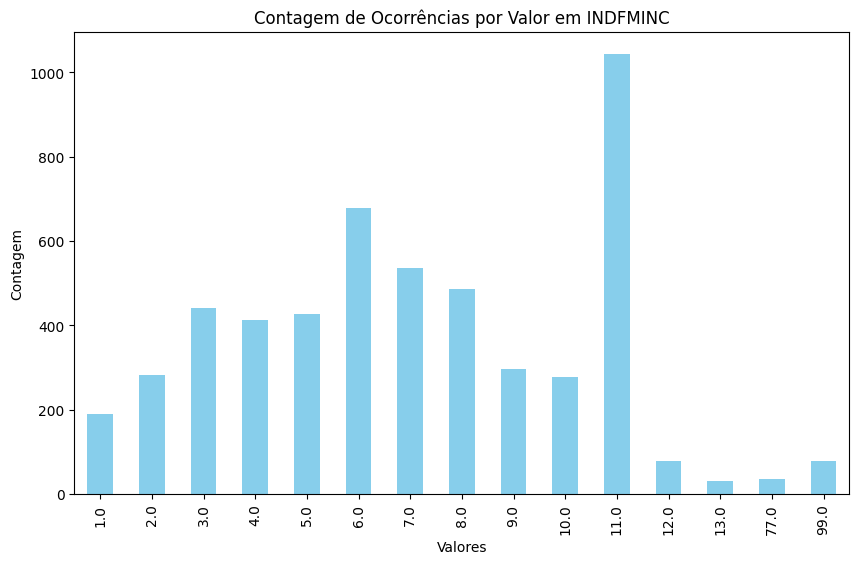

In [31]:
# Calculando as contagens de ocorrências para a coluna 'INDFMINC'
value_counts = df_junto['INDFMINC'].value_counts()

# Ordenando os valores pelas categorias
value_counts_sorted = value_counts.sort_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
value_counts_sorted.plot(kind='bar', color='skyblue')

# Adicionando título e rótulos aos eixos
plt.title('Contagem de Ocorrências por Valor em INDFMINC')
plt.xlabel('Valores')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

**Conclusões importantes**:

- A categoria mais comum de renda é aquela referente a famílias que recebem 75 mil dólares ou mais.

- A segunda categoria menos comum é para famílias que recebem entre 0 e 5 mil dólares anualmente, enquanto a menos comum é para famílias com renda inferior a 200 mil.

- As categorias mais frequentes são aquelas para famílias com renda superior a 75 mil, seguidas por faixas de renda entre 25 mil e 35 mil, e 35 mil e 45 mil dólares.

- Cerca de 50% dos dados estão concentrados entre 20 mil e 75 mil dólares de renda anual familiar, corroborando com a mediana e a média das categorias.

## **Análise bivariada**

Nessa etapa, vamos analisar as interações entre as variáveis e se, ao realizarmos algumas combinações, conseguimos retirar alguma informação interessante. É aqui que iremos tentar responder às nossas perguntas iniciais, sendo elas:

- Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos?

- Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população?

In [ ]:
# Em breve!!!